In [4]:
# load all data
# infer_datetime_format = True means it take date and time as string and fatching data is faster
# header=0 means fisrt row become headline
import pandas as pd
import numpy as np
dataset = pd.read_csv(r'D:\household_power_consumption 2.txt', sep = ';', 
                   header=0, low_memory=False, infer_datetime_format = True, 
                   parse_dates= {'datetime':[0,1]}, index_col=['datetime'])

In [20]:
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(6)
memory usage: 79.2+ MB


In [27]:
# mark all missing values
dataset.replace('?', np.nan, inplace=True)
# make dataset numeric
dataset = dataset.astype('float32')

We can implement this in a function named fill_missing() that will take the NumPy array of the data and copy values from exactly 24 hours ago.

In [33]:
# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if np.isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]

We can apply this function directly to the data within the DataFrame.

In [34]:
# fill missing
fill_missing(dataset.values)

Now we can create a new column that contains the remainder of the sub-metering, using the calculation from the previous section.

In [36]:
# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

We can now save the cleaned-up version of the dataset to a new file; in this case we will just change the file extension to .csv and save the dataset as 

In [37]:
# save updated dataset
dataset.to_csv('household_power_consumption.csv')

 loading, cleaning-up, and saving the dataset is listed below

In [39]:
# load and clean-up data
from numpy import nan
from numpy import isnan
from pandas import read_csv
from pandas import to_numeric

# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]

# load all data
dataset = read_csv(r'D:\household_power_consumption 2.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

# mark all missing values
dataset.replace('?', nan, inplace=True)

# make dataset numeric
dataset = dataset.astype('float32')

# fill missing
fill_missing(dataset.values)

# add a column for for the remainder of sub metering
values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

# save updated dataset
dataset.to_csv('household_power_consumption.csv')

specific question

## Given recent power consumption, what is the expected power consumption for the week ahead?

### This requires that a predictive model forecast the total active power for each day over the next seven days.

### problem is referred to as a multi-step time series forecasting 

### A model of this type could be helpful within the household in planning expenditures. It could also be helpful on the supply side for planning electricity demand for a specific household

### We can achieve this easily using the resample() function on the pandas DataFrame. Calling this function with the argument ‘D‘ allows the loaded data indexed by date-time to be grouped by day (see all offset aliases).

http://pandas.pydata.org/pandas-docs/stable/timeseries.html #offset-aliases

In [105]:
# resample minute data to total for each day
from pandas import read_csv

# load the new file
dataset = read_csv(r'C:\Users\KARM\Desktop\python\household_power_consumption.csv', 
                   header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

# resample data to daily
daily_groups = dataset.resample('D')
daily_data = daily_groups.sum()

# summarize




MemoryError: 

In [104]:
# save
daily_data.to_csv('household_power_consumption_days.csv')
print(daily_data.shape)
daily_data.head()

(1442, 8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933319
2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666732
2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433281
2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900043
2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800011


### Running the example creates a new daily total power consumption dataset and saves the result into a separate file named ‘household_power_consumption_days.csv‘.

### Evaluation Metric
### A forecast will be comprised of seven values, one for each day of the week ahead.

### The units of the total power are kilowatts and it would be useful to have an error metric that was also in the same units. Both Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE) fit this bill but we use RMSE

### The performance metric for this problem will be the RMSE for each lead time from day 1 to day 7.

In [51]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()

# calculate an RMSE score for each day
    for i in range(actual.shape[1]):
# calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
# calculate rmse
        rmse = sqrt(mse)
# store
        scores.append(rmse)
# calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

## Train and Test Sets
### 1. We will use the first three years of data for training predictive models and the final year for evaluating models.

### 2. The data in a given dataset will be divided into standard weeks. These are weeks that begin on a Sunday and end on a Saturday.

### 3. We will split the data into standard weeks, working backwards from the test dataset.



### 4. The final year of the data is in 2010 and the first Sunday for 2010 was January 3rd. The data ends in mid November 2010 and the closest final Saturday in the data is November 20th. This gives 46 weeks of test data.

### 5. The first and last rows of daily data for the test dataset are provided below for confirmation

### 6. The function split_dataset() below splits the daily data into train and test sets and organizes each into standard weeks. using the NumPy split() function.

In [57]:
# split a univariate dataset into train/test sets
def split_dataset(data):
# split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    
# restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# The complete code example is listed below.

In [61]:
# split into standard weeks
from numpy import split
from numpy import array
from pandas import read_csv

# split a univariate dataset into train/test sets
def split_dataset(data):
# split into standard weeks
    train, test = data[1:-328], data[-328:-6]
# restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
train, test = split_dataset(dataset.values)

# validate train data
print(train.shape)
print(train[0, 0, 0], train[-1, -1, 0])

# validate test
print(test.shape)
print(test[0, 0, 0], test[-1, -1, 0])

(159, 7, 8)
3390.46 1309.2679999999998
(46, 7, 8)
2083.4539999999984 2197.006000000004


### Walk-Forward Validation
### Models will be evaluated using a scheme called walk-forward validation.
https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/
### k-fold Cross Validation Does Not Work For Time Series Data and Techniques That You Can Use Instead.

### The name of a function is provided for the model as the argument “model_func“. This function is responsible for defining the model, fitting the model on the training data, and making a one-week forecast.

### The forecasts made by the model are then evaluated against the test dataset using the previously defined evaluate_forecasts() function.

In [63]:
# evaluate a single model
def evaluate_model(model_func, train, test):
# history is a list of weekly data
    history = [x for x in train]

# walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
# predict the week
        yhat_sequence = model_func(history)
# store the predictions
        predictions.append(yhat_sequence)
# get real observation and add to history for predicting the next week
        history.append(test[i, :])
    predictions = array(predictions)
# evaluate predictions days for each week
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores

### The function below named summarize_scores() will display the performance of a model as a single line for easy comparison with other models

In [64]:
# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores])
    print('%s: [%.3f] %s' % (name, score, s_scores))

# Autocorrelation Analysis

### We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

### The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

### observations with previous time steps, called lags. correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

### A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram, or an autocorrelation plo

### In order to calculate and plot the autocorrelation, we must convert the data into a univariate time series. Specifically, the observed daily total power consumed.



### The to_series() function below will take the multivariate data divided into weekly windows and will return a single univariate time series.

In [66]:
# We can call this function for the prepared training dataset.
# convert windows of weekly multivariate data into a series of total power
def to_series(data):
# extract just the total power from each week
    series = [week[:, 0] for week in data]
# flatten into a single series
    series = array(series).flatten()
    return series

## First, the daily power consumption dataset must be loaded.



In [67]:
# load the new file
dataset = read_csv(r'C:\Users\KARM\Desktop\python\household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

In [68]:
# split into train and test sets
# split into train and test
train, test = split_dataset(dataset.values)

In [70]:
# convert training data into a series
series = to_series(train)

We can then create a single figure that contains both an ACF and a PACF plot. The number of lag time steps can be specified. We will fix this to be one year of daily observations, or 365 days.

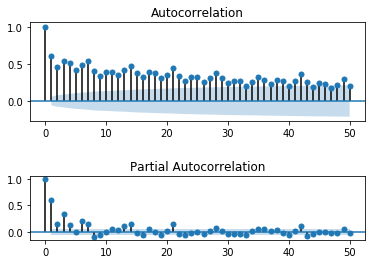

In [113]:
# acf and pacf plots of total power
from numpy import split
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# split a univariate dataset into train/test sets
def split_dataset(data):

    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]

    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# convert windows of weekly multivariate data into a series of total power
def to_series(data):

    # extract just the total power from each week
    series = [week[:, 0] for week in data]

    # flatten into a single series
    series = array(series).flatten()
    return series

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])

# split into train and test
train, test = split_dataset(dataset.values)

# convert training data into a series
series = to_series(train)

# plots
pyplot.figure()
lags = 365
# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=50) # zoom and fine image
# pacf
axis = pyplot.subplot(3, 1, 3)
plot_pacf(series, ax=axis, lags=50)
# show plot
pyplot.show()

#### We can clearly see a familiar autoregression pattern across the two plots. This pattern is comprised of two elements:

#### ACF: A large number of significant lag observations that slowly degrade as the lag increases.
#### PACF: A few significant lag observations that abruptly drop as the lag increases.
#### The ACF plot indicates that there is a strong autocorrelation component, whereas the PACF plot indicates that this component is distinct for the first approximately seven lag observations.

#### This suggests that a good starting model would be an AR(7); that is an autoregression model with seven lag observations used as input.